**Authors:** Jozef Hanč, Martina Hančová  <br> *[Faculty of Science](https://www.upjs.sk/en/faculty-of-science/?prefferedLang=EN), P. J. Šafárik University in Košice, Slovakia* <br> emails: [jozef.hanc@upjs.sk](mailto:jozef.hanc@upjs.sk)
***

# <font color = brown, size=6> Numerical inversion of ratio (Broda-Kan Approach)</font>

# <font color = brown>Algorithms based on a integral sum approximation
</font>

<font size=5> Computational tools: </font>  **<font size=5>MATLAB (Own code)</font>**  

code `cf_Ratio_BK.m`   
code `cf_Ratio_BKB.m` 

---

**Section 3.2:** Broda-Kan inversion formula for ratio $T$ of independent RVs $X_1,X_2$
$$
f_T(x) = \frac{1}{\pi^2} \int_0^{+\infty} \int_{-\infty}^{+\infty} \Re\left\{\frac{\varphi_{X_1}(t_1)}{t_2} \varphi_{X_2}^{\prime}(-t_2 - x t_1)\right\} d t_1 d t_2.
$$

**Ref.** Hanč J., Hančová M., Borovský D., Probability distributions and calculations for Hake’s ratio statistics in measuring effect size, 
*preprint submitted to Statistical Papers*

----
`cf_Ratio_BK.m` calculates **BK** inversion char formula for the **ratio** PDF via fully vectorized double integral Rieman sum
$$
f_T(x) =
f\left(x_1, x_2=1\right)\approx\frac{1}{\pi^2} h_1 h_2 \sum_{v_1=-N}^{N} \sum_{v_2=0}^{N}  \Re\left\{ \varphi_{X_2}^{\prime}(- x_1 b_1 - x_2 b_2) \frac{\varphi_{X_1}(b_1)}{b_2}\right\}$$
$$b_1=h_1\left(v_1+0.5\right), b_2=h_2\left(v_2+0.5\right)$$

`cf_Ratio_BKB.m` calculates **BK** formula for the **ratio** PDF as the iterated integration via the **B**uilt-in 1D integrator (`integral`)
$$
f_T(x) = \frac{1}{\pi^2}  \int_{-\infty}^{+\infty}  \Re\left\{ \varphi_{X_1}(t_1)\int_0^{+\infty} 
\frac{\varphi_{X_2}'(-t_2 - x t_1)}{t_2} d t_2 \right\} d t_1
$$

---

# Hake ratio as an example

For ratio of independent normal variables:  $T = X_1/X_2$

Numerator $ X_1 \sim N(a, 1), a = 1.5 $:
- CF: $ \varphi_{X_1}(t) = e^{i a t - \frac{t^2}{2}}$

Denominator $ X_2 \sim N(b, 1) $, $ b = 1 $\:
- CF: $ \varphi_{X_2}(t) = e^{i b t - \frac{t^2}{2}}$


In [1]:
% characteristic function of X1 ~ N(a,1)
a = 1.5;
cf1 = @(t1) exp(1i * a * t1 - t1.^2 / 2);

% characteristic function of X2 ~ N(b,1) and its derivative
b = 1;
cf2 = @(t2) exp(1i * b* t2 - t2.^2 / 2);
cf2_dif = @(t2) (1i*b - t2) .* exp(1i * b* t2 - t2.^2 / 2);

# Set of points x for PDF

In [2]:
% N points in a default six sigma interval for X1
N = 200;

# PDF via the built-in 1D integrator
code `cf_Ratio_BKB.m` 

### BKBP infinity lims + num. der. cf2

In [3]:
% setting options
clear options;
options.isPlot = true;
options.InfinityLimits = true;
options.xN = N;

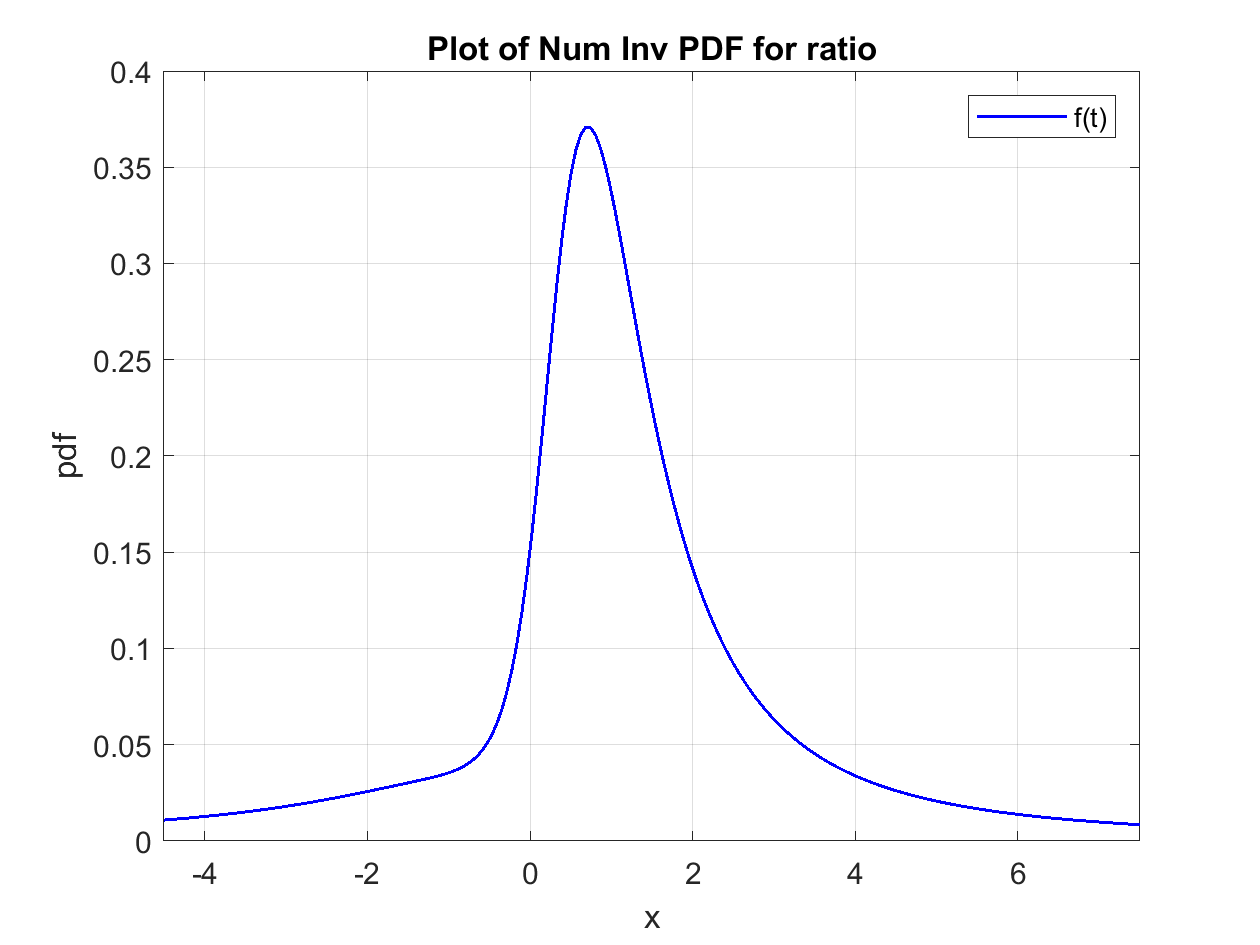

         Description: 'PDF of ratio X1/X2 from the char. functions'
     inversionMethod: 'Broda-Kan'
    quadratureMethod: 'Built-in 1D numerical integration https://www.mathworks.com/help/matlab/ref/integral.html'
          methodAbbr: 'BKB:Infs:NumDer'
        parallelCPUs: 1
                 cf1: @(t1)exp(1i*a*t1-t1.^2/2)
                 cf2: @(t2)exp(1i*b*t2-t2.^2/2)
      cf2derSymbolic: []
                  xN: 200
                   x: [-4.5008 -4.4404 -4.3801 -4.3198 -4.2595 -4.1992 -4.1389 -4.0786 -4.0183 -3.9580 -3.8977 -3.8374 -3.7770 -3.7167 -3.6564 -3.5961 -3.5358 -3.4755 ... ] (1x200 double)
                 pdf: [0.0109 0.0111 0.0113 0.0115 0.0117 0.0119 0.0122 0.0124 0.0127 0.0129 0.0132 0.0135 0.0137 0.0140 0.0143 0.0146 0.0149 0.0152 0.0155 0.0159 ... ] (1x200 double)
              t1_min: -Inf
              t1_max: Inf
              t2_min: 1.0000e-15
              t2_max: Inf
                rtol: 1.0000e-04
             options: [1x1 struct]
             runtime:

In [4]:
% num inversion of ratio
[result, RpdfB] = cf_Ratio_BKB(cf1, cf2, [], options);
disp(result)

In [5]:
% Set of x points in a default six sigma interval
x1 = result.x;
xMin = min(result.x);
xMax = max(result.x);

### Parallel CPU calculation

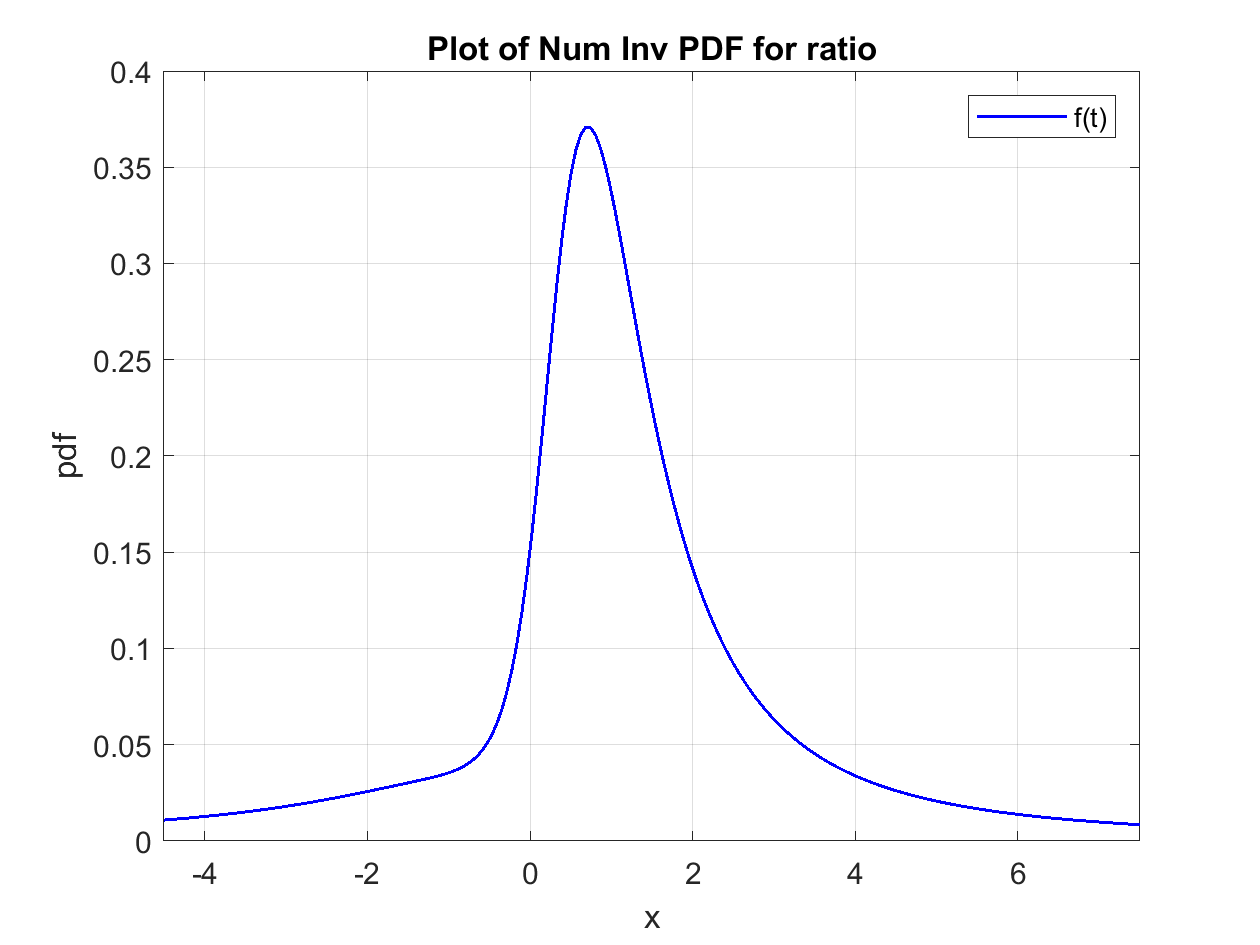

         Description: 'PDF of ratio X1/X2 from the char. functions'
     inversionMethod: 'Broda-Kan'
    quadratureMethod: 'Built-in 1D numerical integration https://www.mathworks.com/help/matlab/ref/integral.html'
          methodAbbr: 'BKB:Infs:NumDer:parCPU'
        parallelCPUs: 8
                 cf1: @(t1)exp(1i*a*t1-t1.^2/2)
                 cf2: @(t2)exp(1i*b*t2-t2.^2/2)
      cf2derSymbolic: []
                  xN: 200
                   x: [-4.5008 -4.4404 -4.3801 -4.3198 -4.2595 -4.1992 -4.1389 -4.0786 -4.0183 -3.9580 -3.8977 -3.8374 -3.7770 -3.7167 -3.6564 -3.5961 -3.5358 -3.4755 ... ] (1x200 double)
                 pdf: [0.0109 0.0111 0.0113 0.0115 0.0117 0.0119 0.0122 0.0124 0.0127 0.0129 0.0132 0.0135 0.0137 0.0140 0.0143 0.0146 0.0149 0.0152 0.0155 0.0159 ... ] (1x200 double)
              t1_min: -Inf
              t1_max: Inf
              t2_min: 1.0000e-15
              t2_max: Inf
                rtol: 1.0000e-04
             options: [1x1 struct]
             r

In [6]:
%using parallelization
options.parallelCPU = true;

% num inversion of ratio
[result, RpdfBP] = cf_Ratio_BKB(cf1, cf2, [], options);
disp(result)

# PDF via built-in analytic form

## AF - Pham-Gia 2007
Pham-Gia 2007
- Pham-Gia, T., Turkkan, N., & Marchand, E. (2007). Density of the Ratio of Two Normal Random Variables and Applications. Communications in Statistics - Theory and Methods, 35(9), 1569–1591. https://doi.org/10.1080/03610920600683689

$$
f_T(t) = \frac{\exp\left(-\frac{a^2 + b^2}{2}\right)}{\pi (1 + t^2)}{}_1F_1\left(\begin{array}{c}
1 \\
1 / 2
\end{array}; q^2\right), \quad q = \frac{b + a t}{\sqrt{1 + t^2}}
$$


In [7]:
% Define the function f_T for specific values
a = 1.5; b = 1;
f_k = @(t) exp(-(a^2 + b^2)/2) / (pi * (1 + t.^2));
q = @(t) (b + a * t) / sqrt(1 + t.^2);

% Define the function f_T for specific values
fTP = @(t) f_k(t) .* Hypergeom1F1(1,1/2, q(t).^2 / 2);

% Values of the function f_T for plot
fTP_values = arrayfun(fTP, x1);

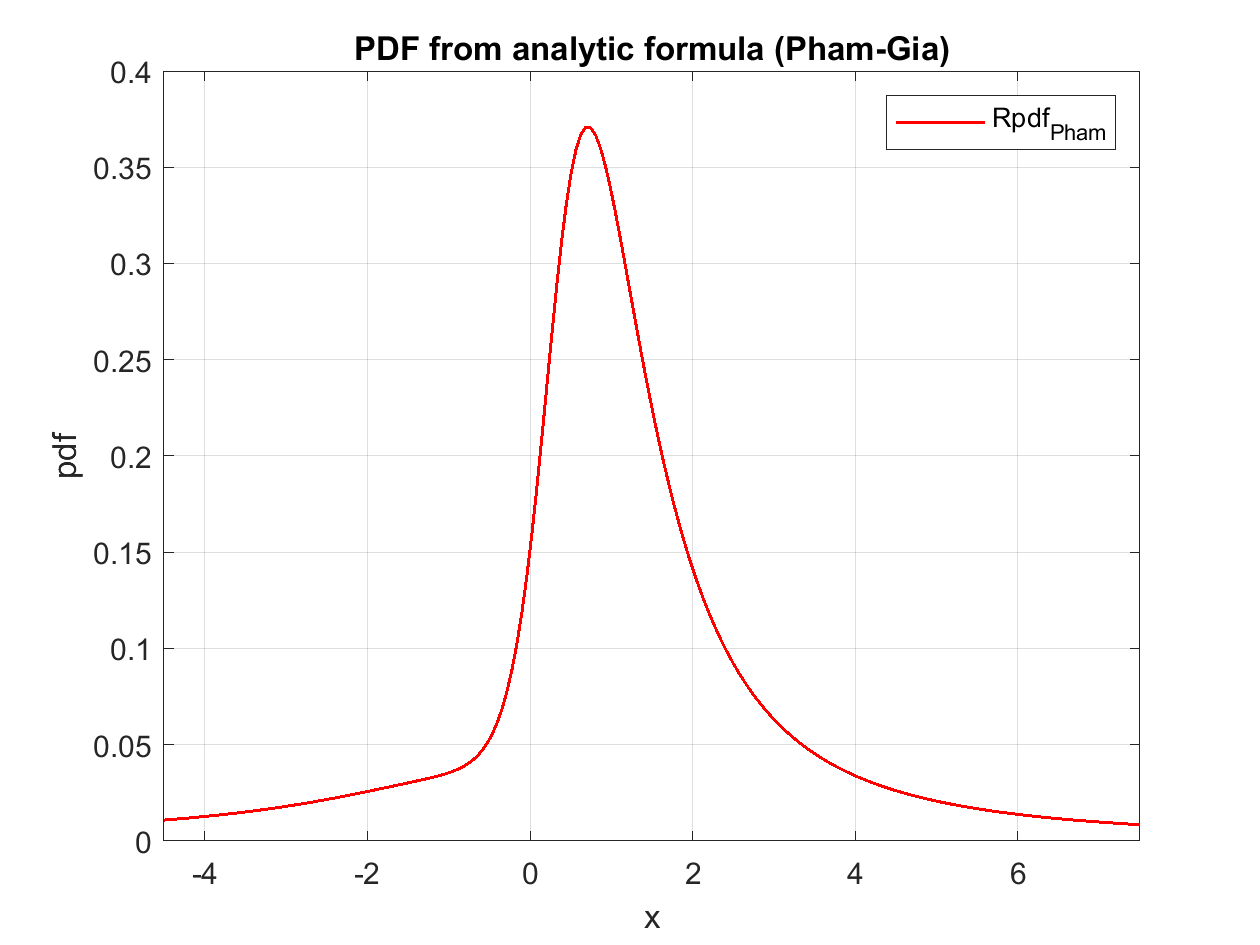

In [8]:
% Plot of PDF from analytic formula
figure
plot(x1, fTP_values, 'r', 'LineWidth', 1);
xlim([xMin xMax]) % plot in  sigma range
grid on;
title('PDF from analytic formula (Pham-Gia)')
xlabel('x')
ylabel('pdf')   
legend('Rpdf_{Pham}');

# PDF via the fast vectorized integral sum
code `cf_Ratio_BK.m`

### BK TR + num. der. cf2

In [9]:
% N points in a default six sigma interval for X1
clear options;
options.isPlot = true;
options.xN = N;

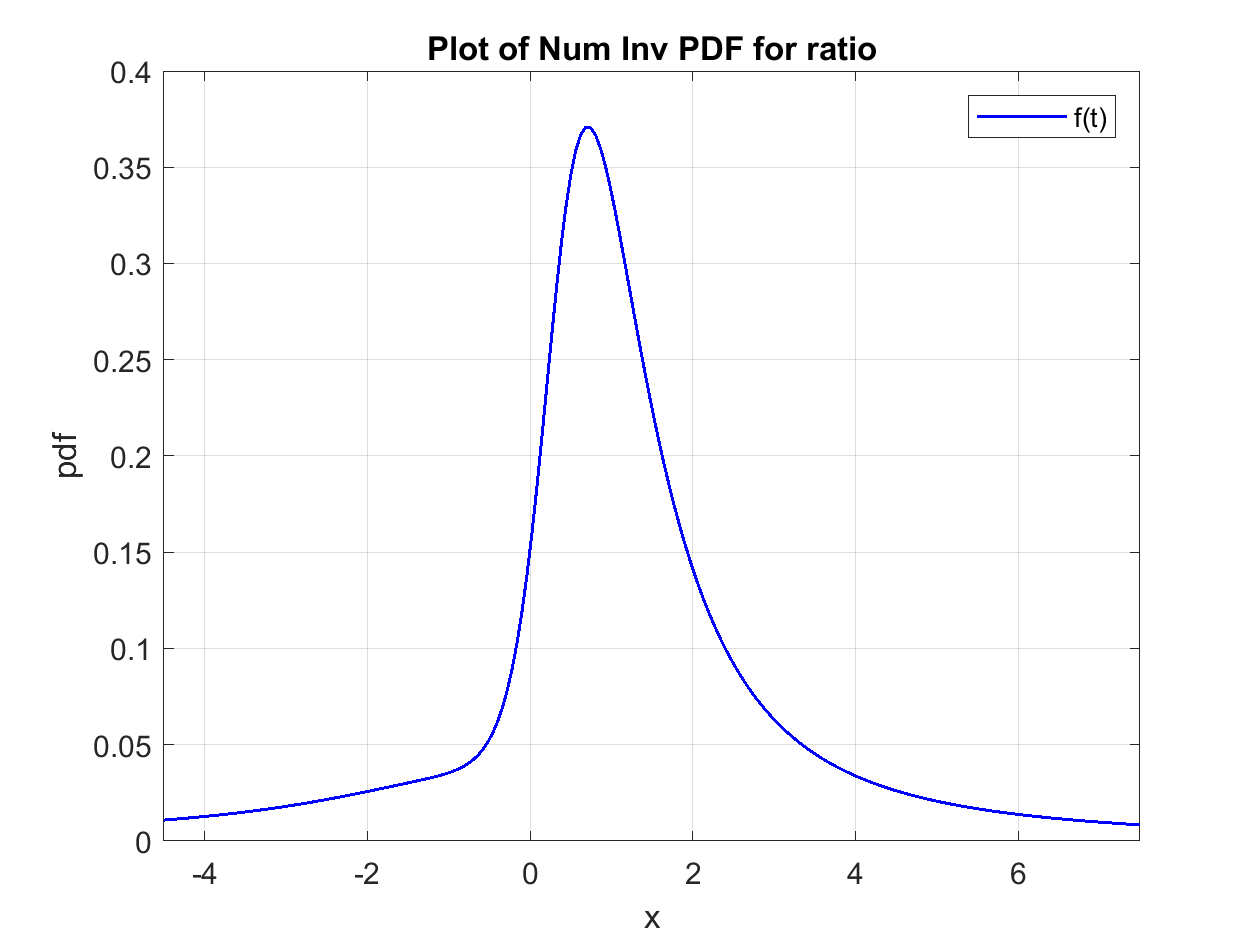

         Description: 'PDF of ratio X1/X2 from the char. functions'
     inversionMethod: 'Broda-Kan'
    quadratureMethod: 'Trapezoidal 2D quadrature'
          methodAbbr: 'BK:TR:NumDer'
                 cf1: @(t1)exp(1i*a*t1-t1.^2/2)
                 cf2: @(t2)exp(1i*b*t2-t2.^2/2)
      cf2derSymbolic: []
                  xN: 200
                   x: [200x1 double]
                 pdf: [200x1 double]
        SixSigmaRule: 6
                   N: 256
                  dt: [0.1745 0.1745]
                   T: 0.0873
               xMean: [1.5000 1]
                xStd: [1.0000 1.0000]
                xMin: [-4.5000 -5.0000]
                xMax: [7.5000 7.0000]
             options: [1x1 struct]
             runtime: 0.1542
     runtimePerPoint: 7.7086e-04



In [10]:
% num inversion of ratio
[result, RpdfTRn] = cf_Ratio_BK(cf1, cf2, [], options);
disp(result)

### BK TR + symb. der. cf2

In [11]:
% using symbolic derivative
options.cf2derSymbolic = cf2_dif;

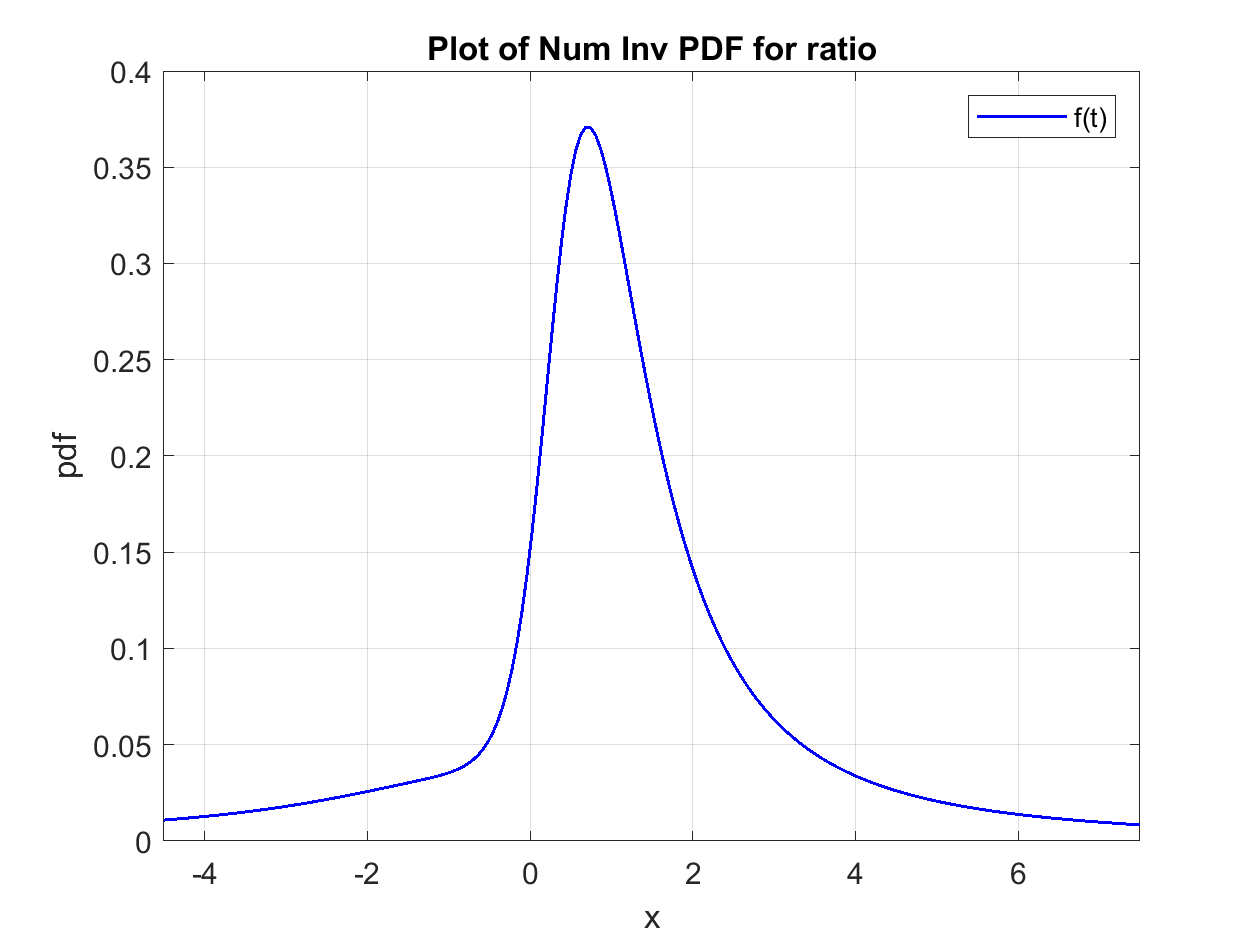

         Description: 'PDF of ratio X1/X2 from the char. functions'
     inversionMethod: 'Broda-Kan'
    quadratureMethod: 'Trapezoidal 2D quadrature'
          methodAbbr: 'BK:TR:SymDer'
                 cf1: @(t1)exp(1i*a*t1-t1.^2/2)
                 cf2: @(t2)exp(1i*b*t2-t2.^2/2)
      cf2derSymbolic: @(t2)(1i*b-t2).*exp(1i*b*t2-t2.^2/2)
                  xN: 200
                   x: [200x1 double]
                 pdf: [200x1 double]
        SixSigmaRule: 6
                   N: 256
                  dt: [0.1745 0.1745]
                   T: 0.0873
               xMean: [1.5000 1]
                xStd: [1.0000 1.0000]
                xMin: [-4.5000 -5.0000]
                xMax: [7.5000 7.0000]
             options: [1x1 struct]
             runtime: 0.0393
     runtimePerPoint: 1.9630e-04



In [12]:
% num inversion of ratio
[result, RpdfTRs] = cf_Ratio_BK(cf1, cf2, [], options);
disp(result)

### BK CC quadrature + num. der. cf2

In [13]:
% N points in six sigma interval for X1
options.isPlot = true;
options.cf2derSymbolic = [];
options.isInterp = true;

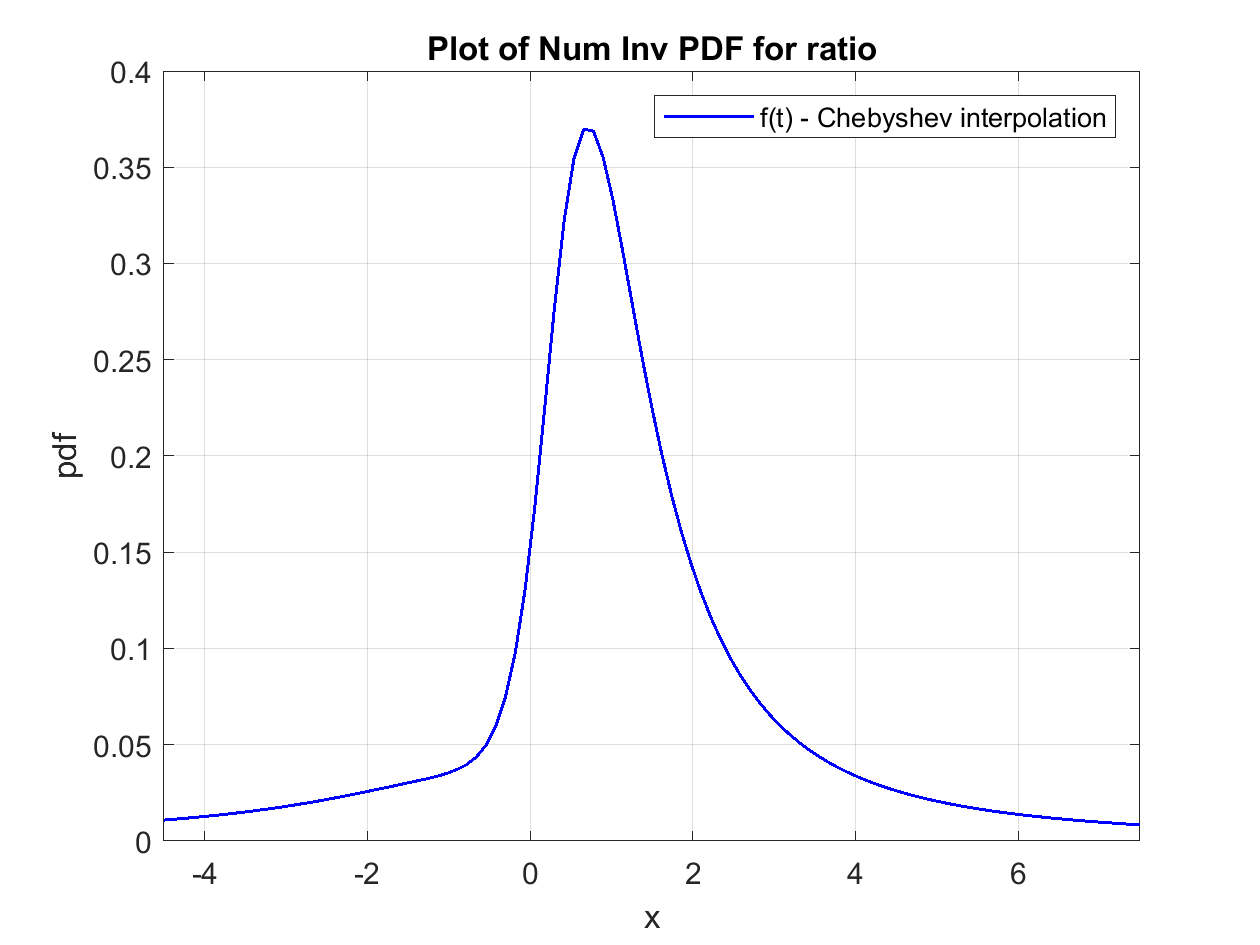

         Description: 'PDF of ratio X1/X2 from the char. functions'
     inversionMethod: 'Broda-Kan'
    quadratureMethod: 'Clenshaw-Curtis 2D quadrature'
          methodAbbr: 'BK:CC:NumDer'
                 cf1: @(t1)exp(1i*a*t1-t1.^2/2)
                 cf2: @(t2)exp(1i*b*t2-t2.^2/2)
      cf2derSymbolic: []
                  xN: 65
                   x: [65x1 double]
                 pdf: [65x1 double]
                 PDF: @(x1new)InterpPDF(x1new,x1,Rpdf)
        SixSigmaRule: 6
                   N: 256
                  dt: [0.1745 0.1745]
                   T: 0.0873
               xMean: [1.5000 1]
                xStd: [1.0000 1.0000]
                xMin: [-4.5000 -5.0000]
                xMax: [7.5000 7.0000]
             options: [1x1 struct]
             runtime: 0.0557
     runtimePerPoint: 8.5694e-04



In [14]:
% num inversion of ratio
[result, Rpdf] = cf_Ratio_BK(cf1, cf2, [], options);
disp(result)

In [15]:
%Step 2 - calculation PDF via CC quadrature
RpdfCC = result.PDF(x1);

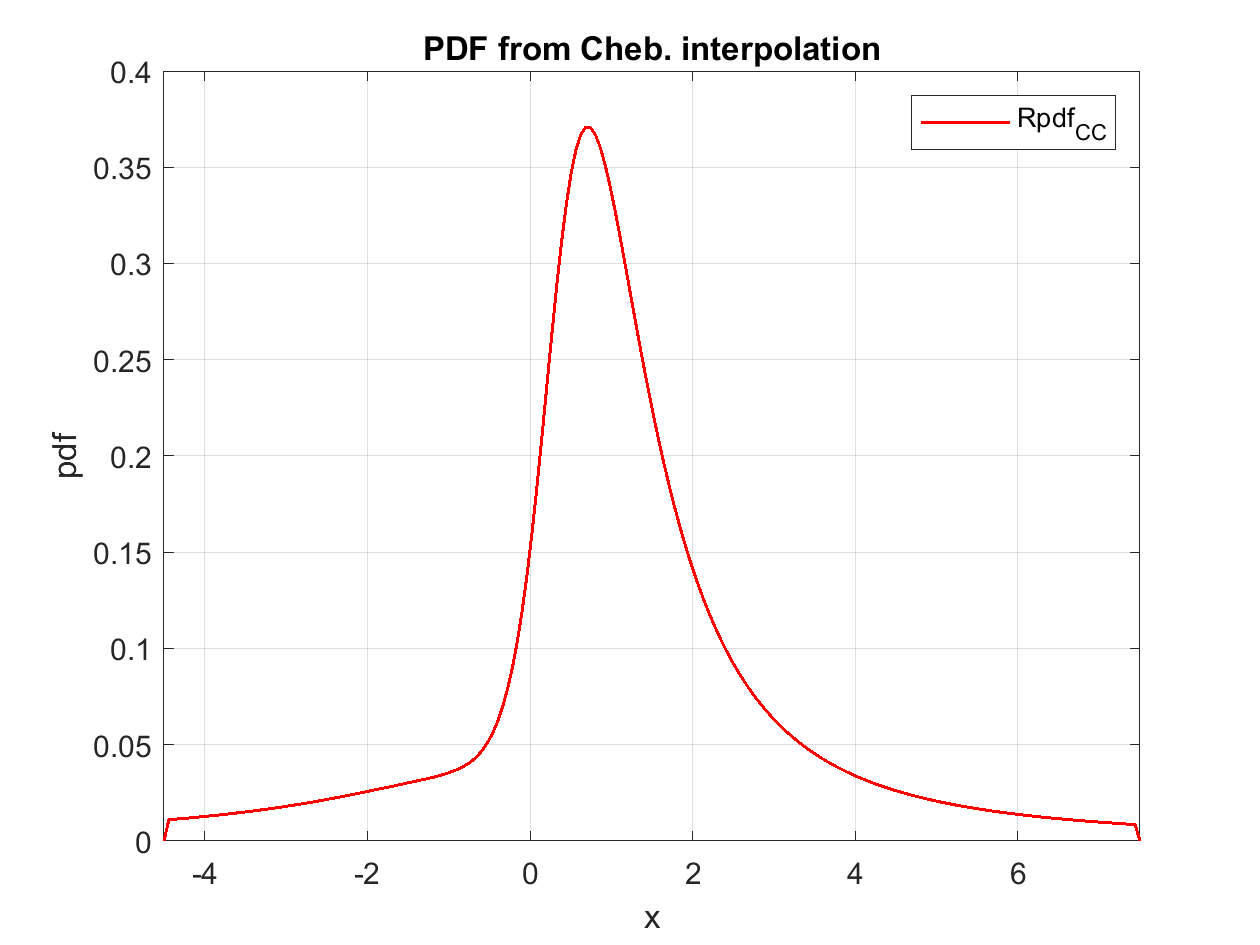

In [16]:
%PDF from Cheb interpolation vs. from Cheb points
figure
plot(x1, RpdfCC, 'r', 'LineWidth', 1);
xlim([xMin xMax]) % plot in  sigma range
grid on,
title('PDF from Cheb. interpolation')
xlabel('x')
ylabel('pdf')   
legend('Rpdf_{CC}');

# Cross-check via Plots

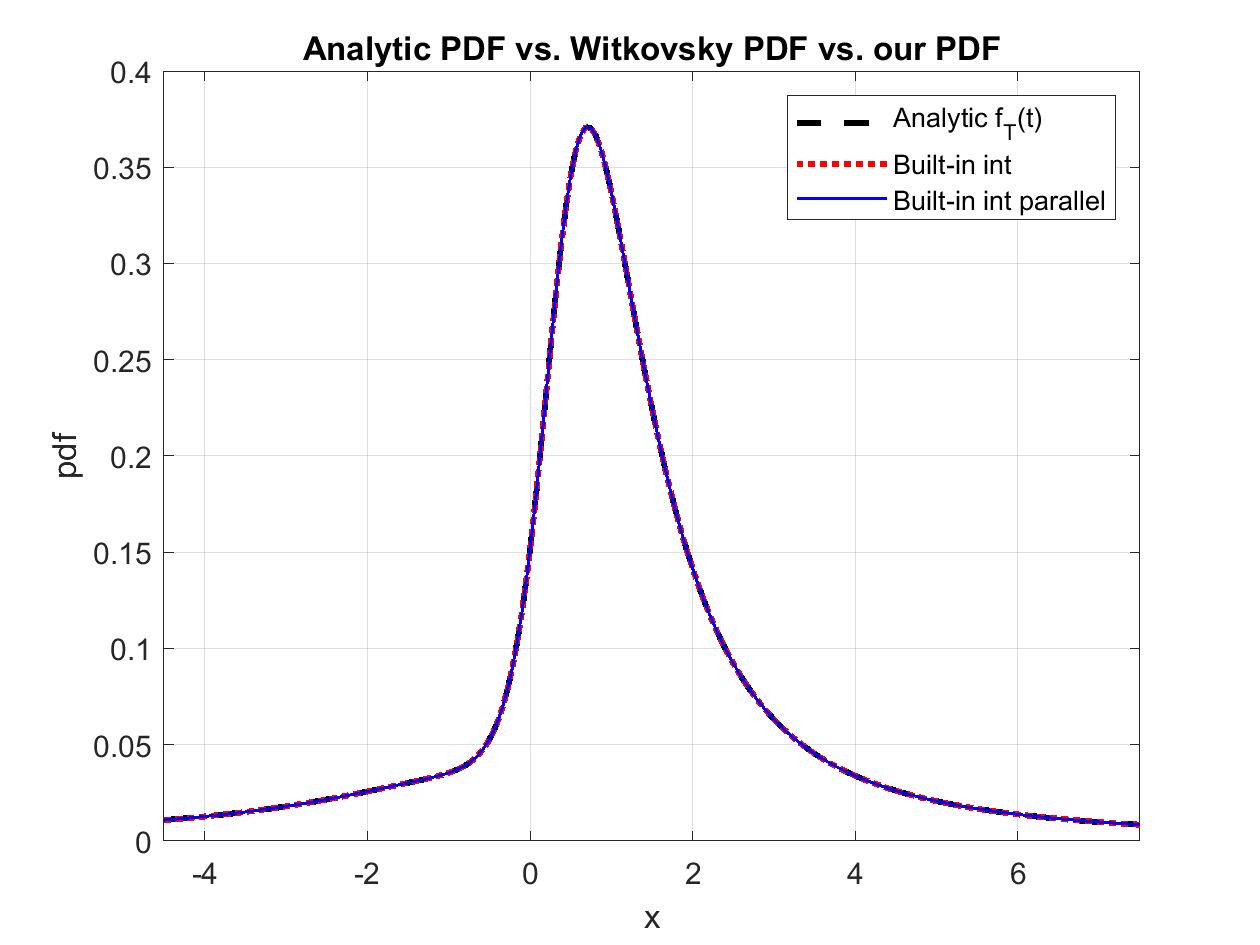

In [17]:
%graphical comparison
figure
plot(x1, fTP_values, 'k--', 'LineWidth', 2);
hold on;
plot(x1, RpdfB, 'r:', 'LineWidth', 2);
hold on;
plot(x1, RpdfBP,'b', 'LineWidth',1)
hold on;
xlim([xMin xMax]) % plot in  sigma range
grid on,
title('Analytic PDF vs. Witkovsky PDF vs. our PDF')
xlabel('x')
ylabel('pdf')   
legend('Analytic f_T(t)', 'Built-in int', 'Built-in int parallel');

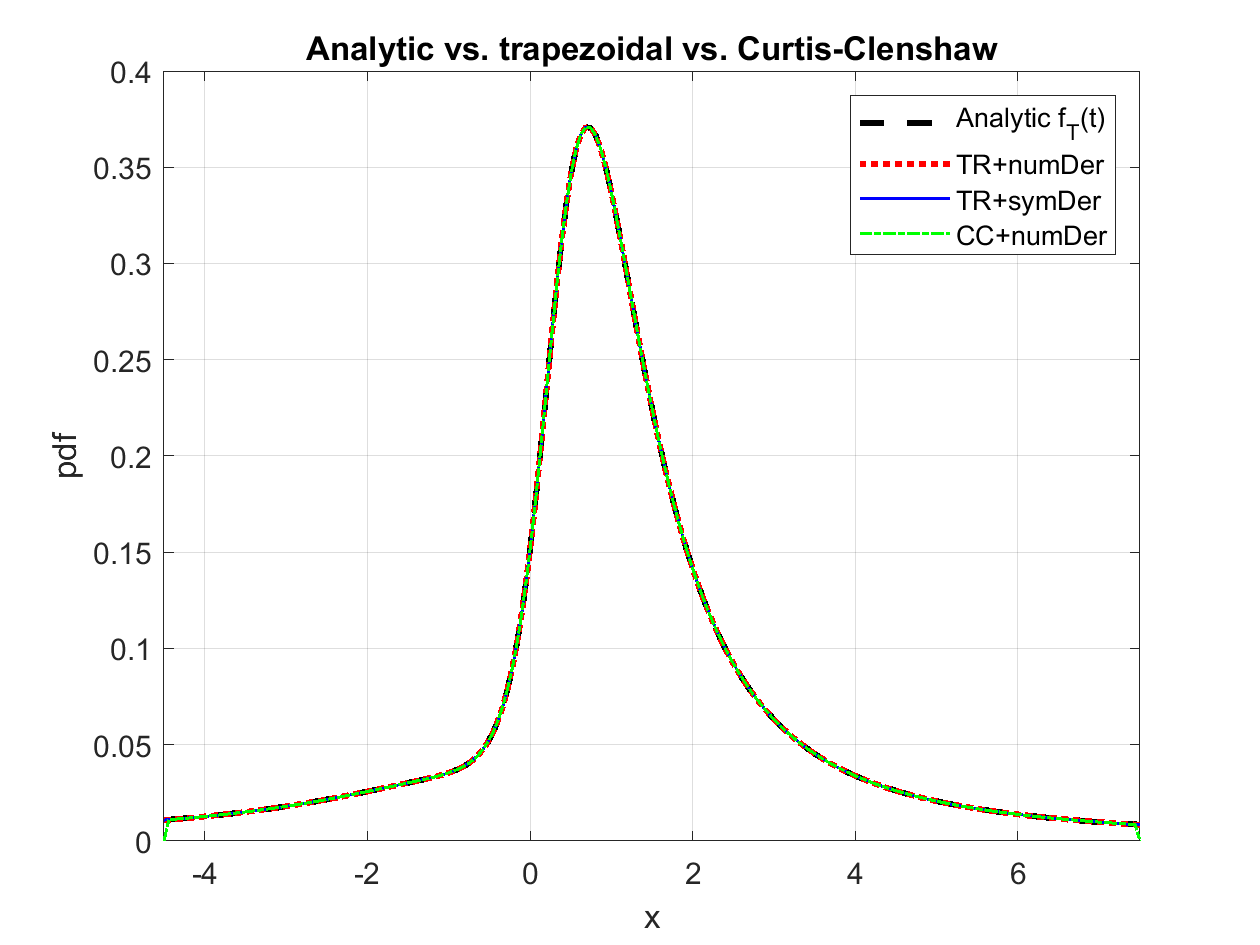

In [18]:
%graphical comparison
figure
plot(x1, fTP_values, 'k--', 'LineWidth', 2);
hold on;
plot(x1, RpdfTRn, 'r:', 'LineWidth', 2);
hold on;
plot(x1, RpdfTRs,'b', 'LineWidth',1)
hold on;
plot(x1, RpdfCC,'g-.', 'LineWidth',1)
hold on;
xlim([xMin xMax]) % plot in  sigma range
grid on,
title('Analytic vs. trapezoidal vs. Curtis-Clenshaw')
xlabel('x')
ylabel('pdf')   
legend('Analytic f_T(t)', 'TR+numDer', 'TR+symDer', 'CC+numDer');